## Problem Statement

 Classification of Articles into One of 5 categories (Sports,Business,Technology,Politics,Entertainment)

### Importing Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [33]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable

import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.simplefilter('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'category_encoders'

### Loading Dataset

In [5]:
# Load the dataset

df = pd.read_csv("flipitnews-data.csv")


In [7]:
# Display the first few rows of the dataset
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


### Exploring the Dataset

In [9]:
df.shape

(2225, 2)

In [11]:
# News articles per category
category_distribution = df['Category'].value_counts()
print("News articles per category:")
print(category_distribution)


News articles per category:
Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


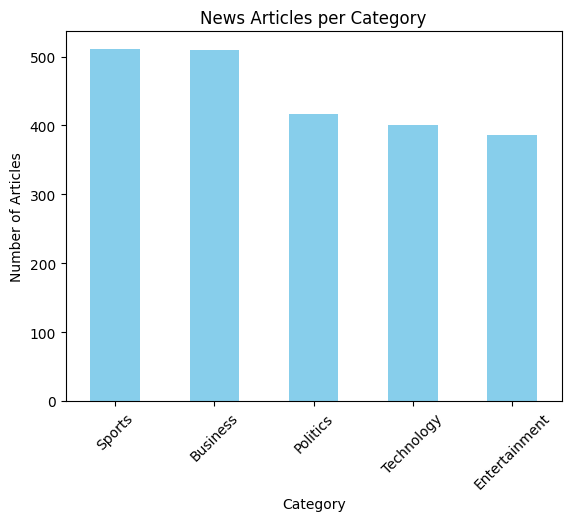

In [17]:
# Plot category distribution
category_distribution.plot(kind='bar', color='skyblue')
plt.title('News Articles per Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [19]:
df["Article"][2]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

### Text Processing

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# User defined function to process text
def process_text(text):
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Tokenize text
    words = word_tokenize(text.lower())
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return " ".join(words)

# Apply the function to the 'Article' column
df['Processed_Article'] = df['Article'].apply(process_text)

# Display a single news article before and after processing
print("Original Article:", df['Article'][0])
print("\n\n\nProcessed Article:", df['Processed_Article'][0])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sharat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Article: tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being

### Encoding And Transforming The Data

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the target variable
ordinal_encoder = OrdinalEncoder()
df['Category'] = ordinal_encoder.fit_transform(df[['Category']])




In [27]:
df

,Category,Article,Processed_Article
0,4.0,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,0.0,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,3.0,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,3.0,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,1.0,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,0.0,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell ja...
2221,2.0,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,1.0,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...
2223,2.0,how political squabbles snowball it s become c...,political squabble snowball become commonplace...


##### Choice between TF-IDF and BOW

In [29]:
# Function to vectorize data
def vectorize_data(method='tfidf'):
    if method == 'bow':
        vectorizer = CountVectorizer()
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Method should be 'bow' or 'tfidf'")
    
    X = vectorizer.fit_transform(df['Processed_Article'])
    return X

In [35]:
# Vectorize using TF-IDF (example)
X = vectorize_data(method='tfidf')
y = df['Category']

### Function to use different models and checking their Classification Metrics

In [63]:
# Binarize the labels for ROC AUC
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])

# Function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, y_test_bin):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    
    # Evaluate the model
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model.__class__.__name__} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model.__class__.__name__} ROC AUC Score: {roc_auc_score(y_test_bin, y_score, multi_class='ovr')}")
    print(f"{model.__class__.__name__} Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"{model.__class__.__name__} Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"{model.__class__.__name__} F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()
    
    # ROC AUC
    plot_roc_auc(y_test_bin, y_score, f'{model.__class__.__name__} ROC AUC')



In [47]:
X_test.shape[0]

445

In [41]:
X_train.shape[0]

1780

### Naive-Bayes Model

In [53]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       101
         1.0       1.00      0.89      0.94        81
         2.0       0.92      0.98      0.95        83
         3.0       0.99      1.00      0.99        98
         4.0       0.95      0.98      0.96        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445

MultinomialNB Confusion Matrix:
[[96  0  5  0  0]
 [ 3 72  2  0  4]
 [ 2  0 81  0  0]
 [ 0  0  0 98  0]
 [ 1  0  0  1 80]]
MultinomialNB ROC AUC Score: 0.997989677299946
MultinomialNB Precision Score: 0.9608132357471417
MultinomialNB Recall Score: 0.9595505617977528
MultinomialNB F1 Score: 0.9593992119336041


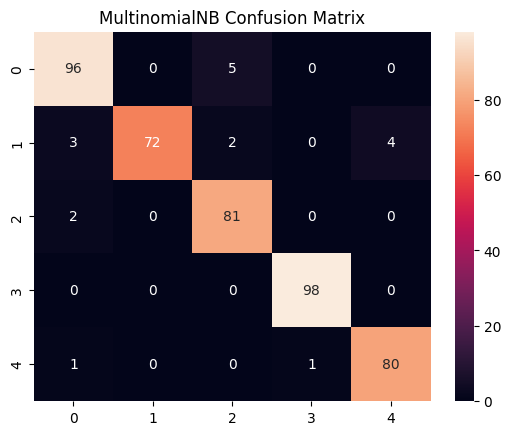

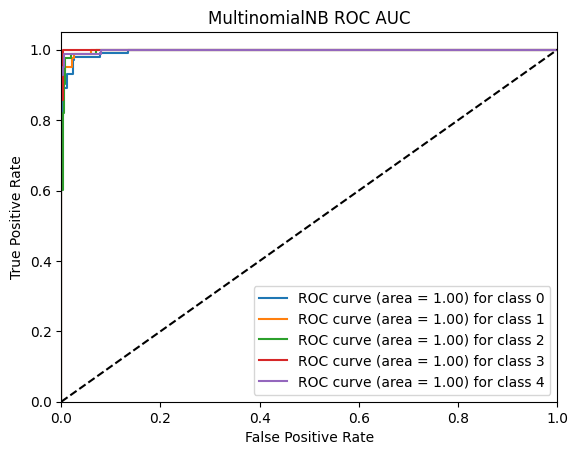

In [70]:
# Train and evaluate models

# Naive Bayes
nb_model = MultinomialNB()
train_and_evaluate(nb_model, X_train, y_train, X_test, y_test, y_test_bin)

### Decision Tree Model

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75       101
         1.0       0.90      0.77      0.83        81
         2.0       0.76      0.82      0.79        83
         3.0       0.89      0.89      0.89        98
         4.0       0.78      0.85      0.81        82

    accuracy                           0.81       445
   macro avg       0.82      0.81      0.81       445
weighted avg       0.82      0.81      0.81       445

DecisionTreeClassifier Confusion Matrix:
[[75  4  8  3 11]
 [ 6 62  3  4  6]
 [10  1 68  3  1]
 [ 2  2  5 87  2]
 [ 5  0  6  1 70]]
DecisionTreeClassifier ROC AUC Score: 0.883503568132384
DecisionTreeClassifier Precision Score: 0.8170054291053663
DecisionTreeClassifier Recall Score: 0.8134831460674158
DecisionTreeClassifier F1 Score: 0.8136705488227823


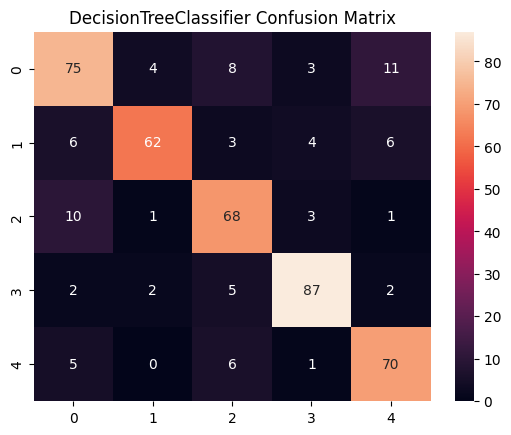

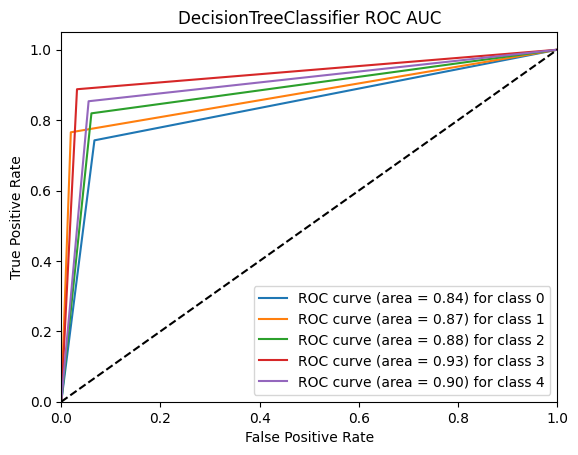

In [72]:
# Decision Tree
dt_model = DecisionTreeClassifier()
train_and_evaluate(dt_model, X_train, y_train, X_test, y_test, y_test_bin)

### Nearest Neighbours Model

KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       101
         1.0       0.97      0.95      0.96        81
         2.0       0.86      0.90      0.88        83
         3.0       0.97      1.00      0.98        98
         4.0       0.95      0.99      0.97        82

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445

KNeighborsClassifier Confusion Matrix:
[[87  0 11  2  1]
 [ 1 77  1  0  2]
 [ 5  1 75  1  1]
 [ 0  0  0 98  0]
 [ 0  1  0  0 81]]
KNeighborsClassifier ROC AUC Score: 0.9889872127275445
KNeighborsClassifier Precision Score: 0.9398095451140671
KNeighborsClassifier Recall Score: 0.9393258426966292
KNeighborsClassifier F1 Score: 0.938995384783357


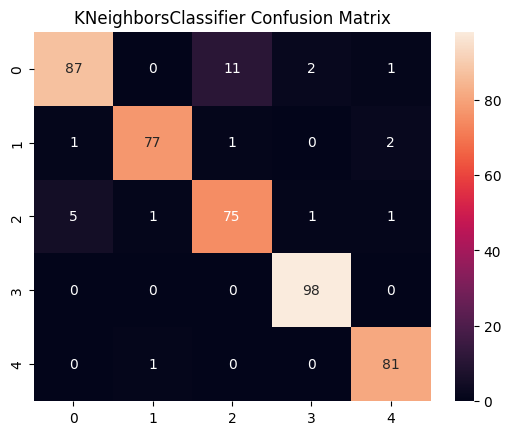

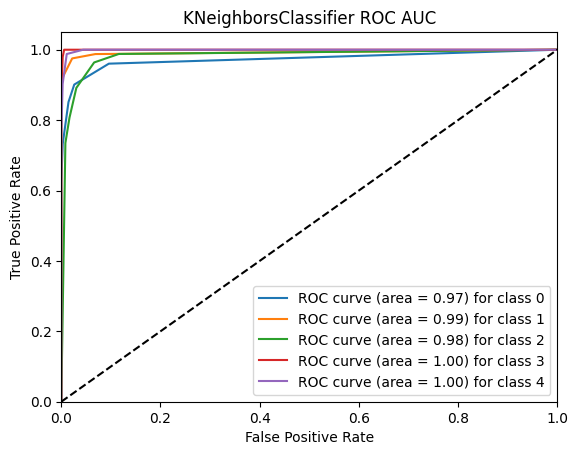

In [74]:
# Nearest Neighbors
knn_model = KNeighborsClassifier()
train_and_evaluate(knn_model, X_train, y_train, X_test, y_test, y_test_bin)

### Random Forest Model

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       101
         1.0       1.00      0.91      0.95        81
         2.0       0.95      0.95      0.95        83
         3.0       0.99      0.99      0.99        98
         4.0       0.97      0.94      0.96        82

    accuracy                           0.96       445
   macro avg       0.96      0.95      0.96       445
weighted avg       0.96      0.96      0.96       445

RandomForestClassifier Confusion Matrix:
[[98  0  3  0  0]
 [ 5 74  0  0  2]
 [ 4  0 79  0  0]
 [ 0  0  1 97  0]
 [ 4  0  0  1 77]]
RandomForestClassifier ROC AUC Score: 0.9970816602404744
RandomForestClassifier Precision Score: 0.9575173523687249
RandomForestClassifier Recall Score: 0.9550561797752809
RandomForestClassifier F1 Score: 0.9554024192879386


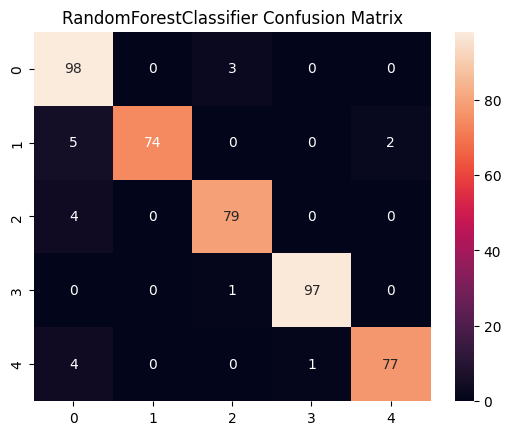

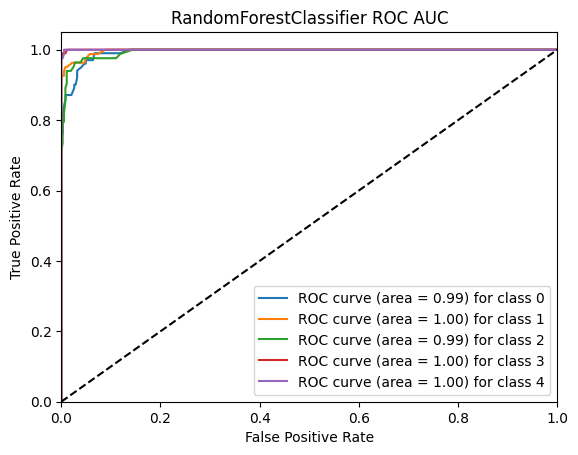

In [76]:
# Random Forest
rf_model = RandomForestClassifier()
train_and_evaluate(rf_model, X_train, y_train, X_test, y_test, y_test_bin)